In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('coin_gecko_2022-03-16.csv')
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB
None


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
#let's check the datatype
df['date']

0     2022-03-16
1     2022-03-16
2     2022-03-16
3     2022-03-16
4     2022-03-16
         ...    
495   2022-03-16
496   2022-03-16
497   2022-03-16
498   2022-03-16
499   2022-03-16
Name: date, Length: 500, dtype: datetime64[ns]

In [7]:
# Check missing values
print(df.isnull().sum())

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64


. Univariate Analysis
Numeric Features Distribution & Outliers

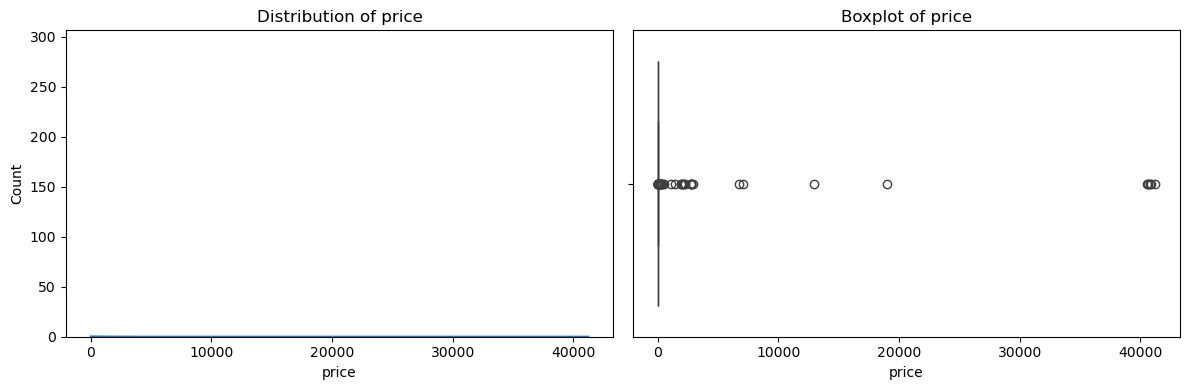

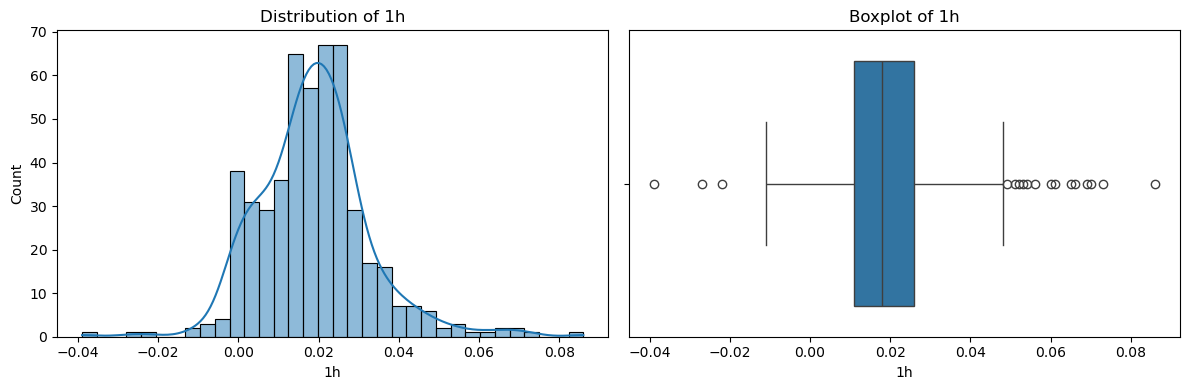

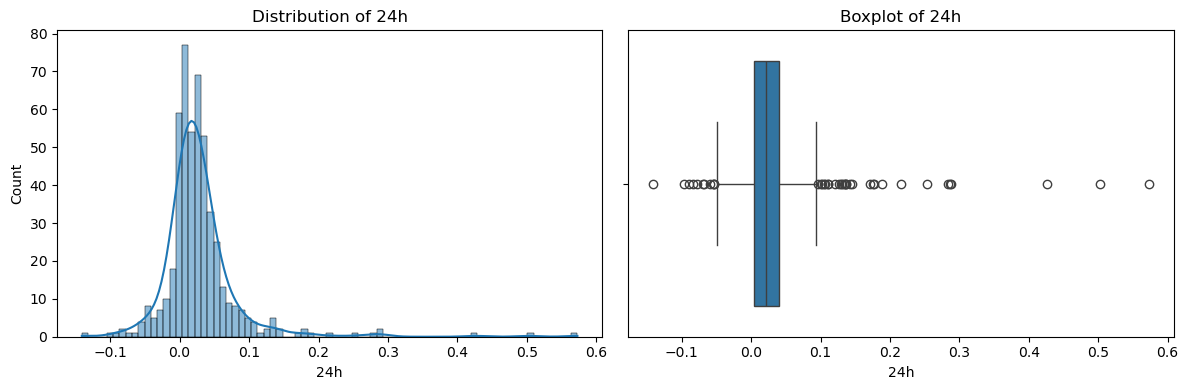

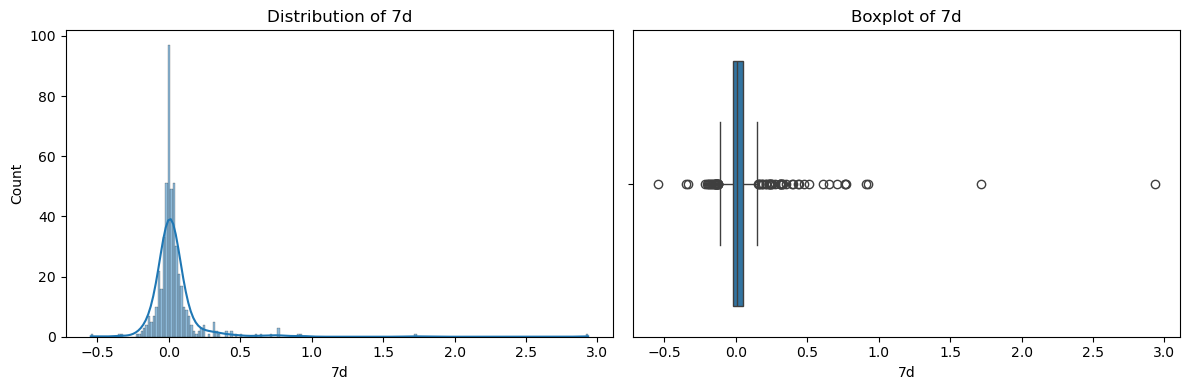

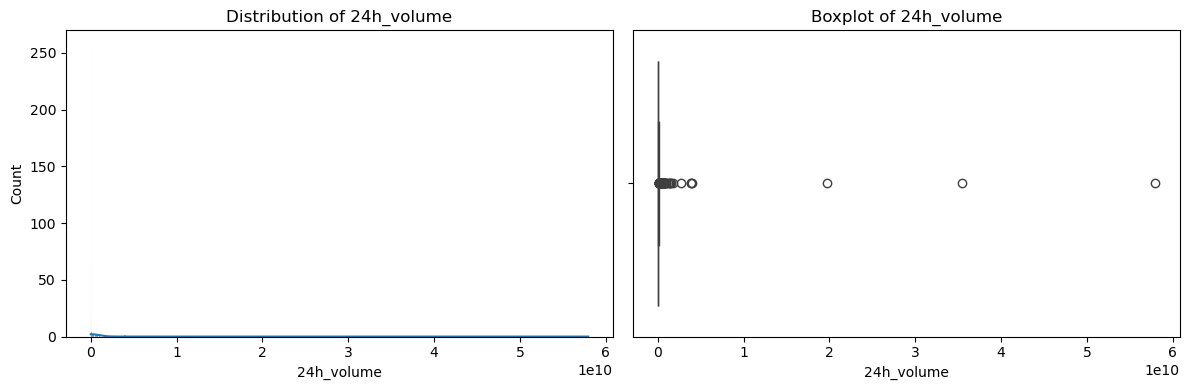

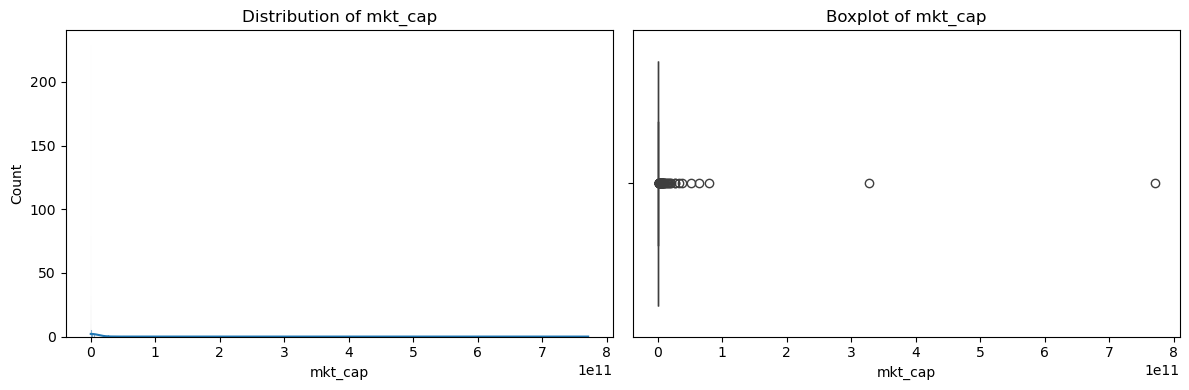

In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot histogram & boxplot for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


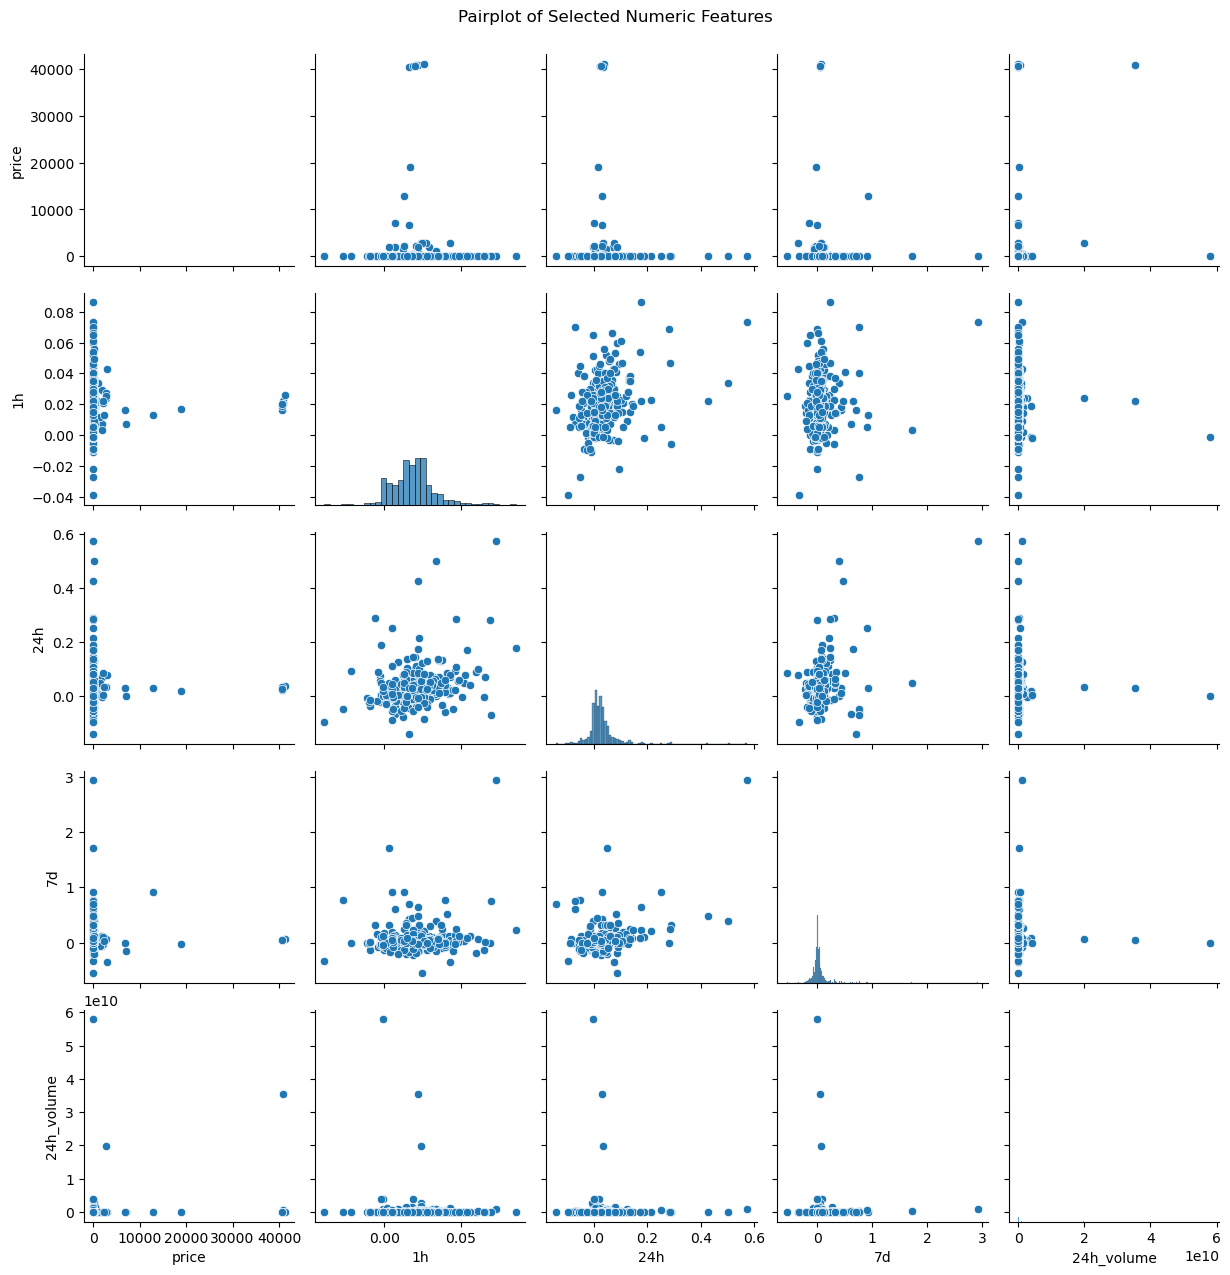

In [9]:
selected_cols = numeric_cols[:5]  # Pick only a few for speed
sns.pairplot(df[selected_cols].dropna())
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()


In [10]:
# Numeric mean imputation
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categorical mode imputation
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
for col in numeric_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower, upper)


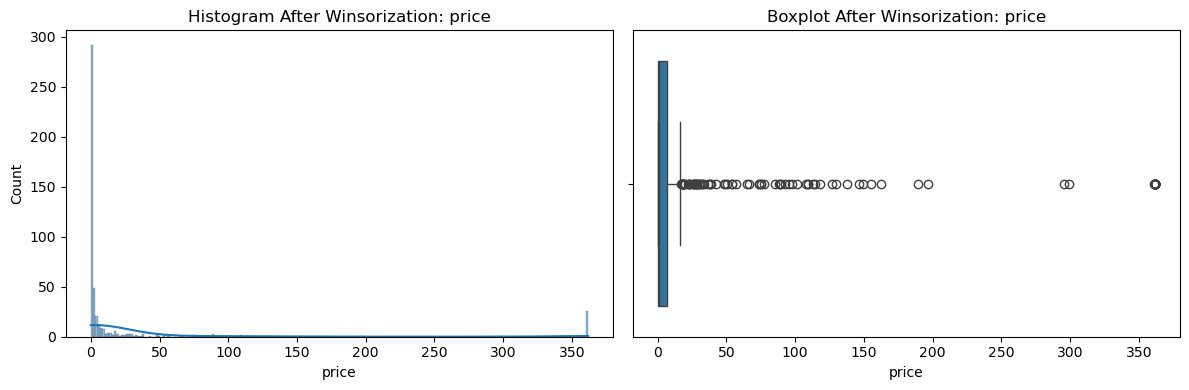

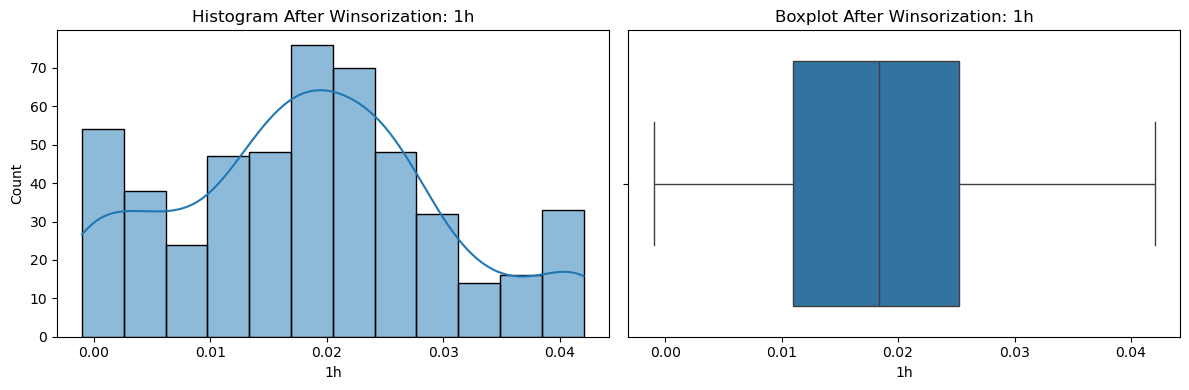

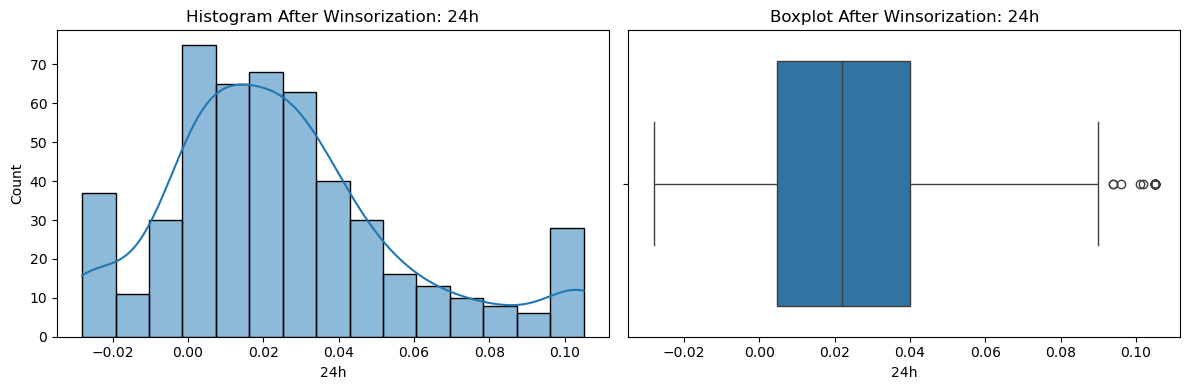

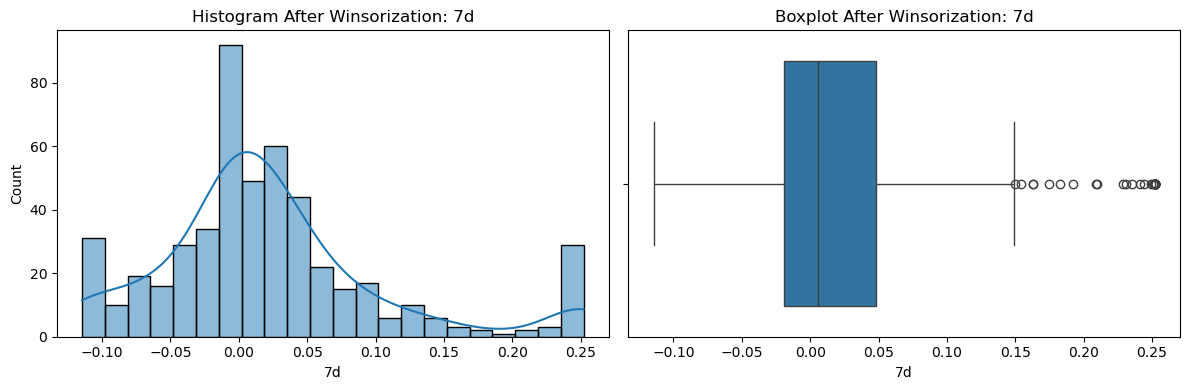

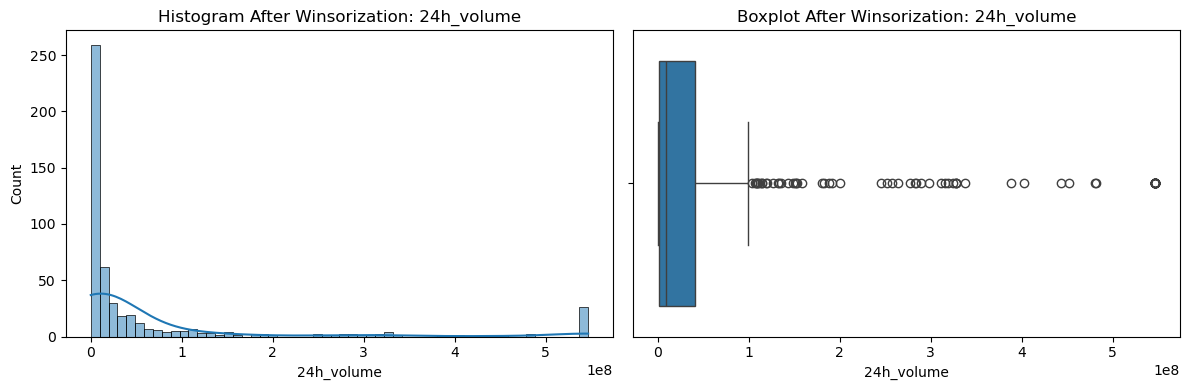

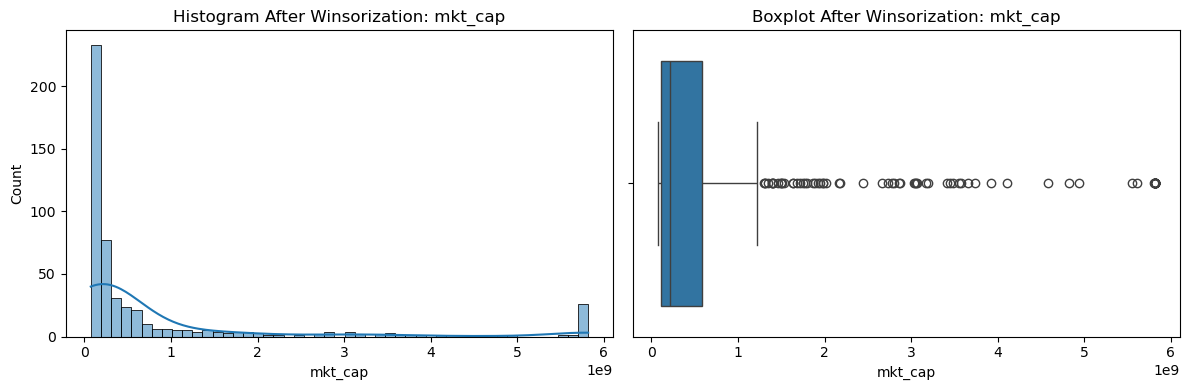

In [12]:
# Plot histogram & boxplot for each numeric feature After Winsorization
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram After Winsorization: {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Winsorization: {col}")

    plt.tight_layout()
    plt.show()

Key Steps:

Date Parsing: Converted date column to datetime.

Missing Value Handling:

Numeric: Mean imputation.

Categorical: Mode imputation.

Outlier Handling: Winsorization (5th to 95th percentile clipping).

Plots Used:

Histograms & Boxplots for distribution check.

Pairplots for correlation insights.

Findings:

Skewness and outliers present in raw numeric columns.

Potential high correlation among liquidity and volume-based fields.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


In [14]:
print("Final Cleaned & Scaled Data:")
print(df_scaled.head())


Final Cleaned & Scaled Data:
      price        1h       24h        7d  24h_volume   mkt_cap
0  3.925427  0.313787  0.152373  0.386140    3.554219  3.459469
1  3.925427  0.488841  0.277683  0.505457    3.554219  3.459469
2 -0.348394 -1.699338 -0.818775 -0.270106    3.554219  3.459469
3  3.925427 -0.036322  0.089719 -0.222379    3.554219  3.459469
4 -0.348396 -1.699338 -0.787448 -0.270106    3.554219  3.459469


##visualization of data after outliers treatmentand scaling

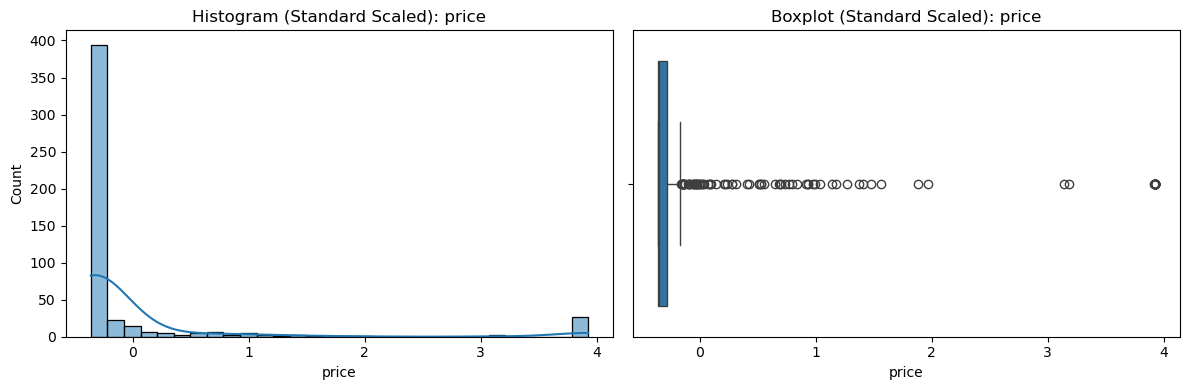

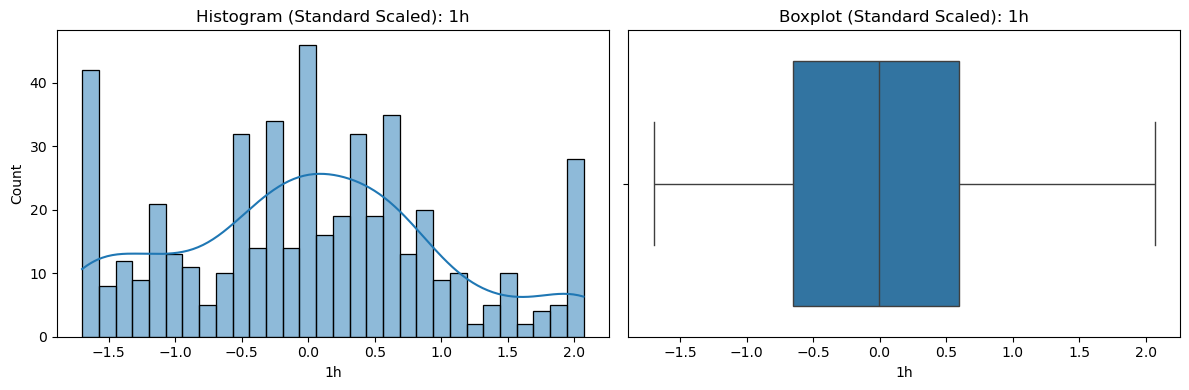

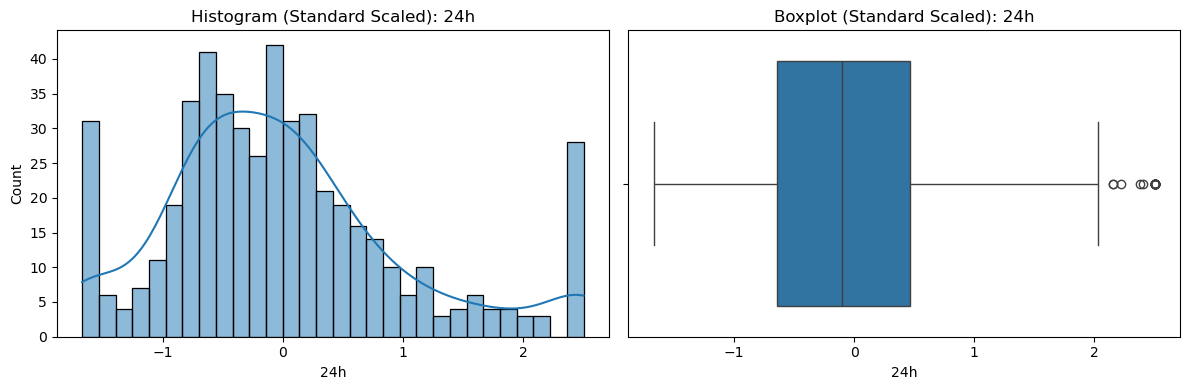

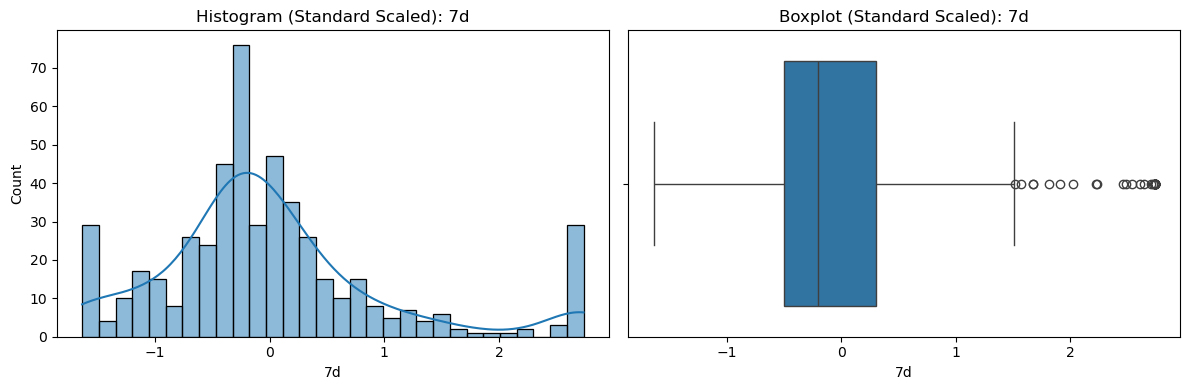

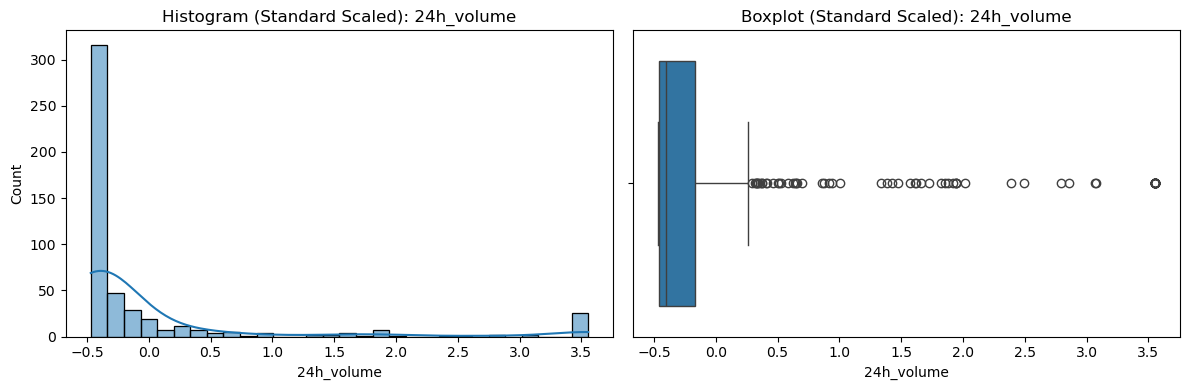

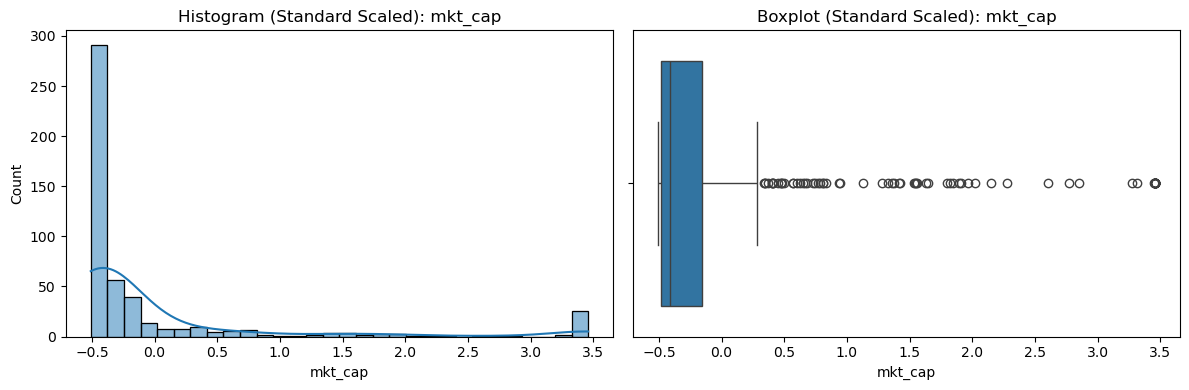

In [17]:
for col in df_scaled.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f"Histogram (Standard Scaled): {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"Boxplot (Standard Scaled): {col}")

    plt.tight_layout()
    plt.show()

##Feature Engineering
 

In [ ]:
# Rename columns for consistency (if not done already)
df_scaled.rename(columns={
    'price': 'current_price',
    '24h_volume': 'total_volume',
    'mkt_cap': 'market_cap',
    '1h': 'change_1h',
    '24h': 'change_24h',
    '7d': 'change_7d'
}, inplace=True)

# 1. Liquidity Ratio
df_scaled['liquidity_ratio'] = df_scaled['total_volume'] / (df_scaled['market_cap'] + 1)

# 2. Log Transforms
df_scaled['log_volume'] = np.log1p(df_scaled['total_volume'])
df_scaled['log_market_cap'] = np.log1p(df_scaled['market_cap'])
df_scaled['log_price'] = np.log1p(df_scaled['current_price'])

# 3. Price Change % (momentum)
df_scaled['price_change_pct'] = df_scaled['current_price'].pct_change().fillna(0)

# 4. Rolling Volume Stats (3-day)
df_scaled['volume_rolling_mean_3d'] = df_scaled['total_volume'].rolling(window=3).mean().fillna(method='bfill')
df_scaled['volume_rolling_std_3d'] = df_scaled['total_volume'].rolling(window=3).std().fillna(method='bfill')

# 5. Volatility (7-day price std)
df_scaled['price_volatility_7d'] = df_scaled['current_price'].rolling(window=7).std().fillna(method='bfill')

# 6. Volume-to-Price Ratio
df_scaled['vol_price_ratio'] = df_scaled['total_volume'] / (df_scaled['current_price'] + 1)

# 7. MarketCap-to-Volume Ratio
df_scaled['marketcap_volume_ratio'] = df_scaled['market_cap'] / (df_scaled['total_volume'] + 1)

# 8. Z-Score of Volume
df_scaled['volume_zscore'] = (df_scaled['total_volume'] - df_scaled['total_volume'].mean()) / df_scaled['total_volume'].std()


##Feature selection

In [ ]:

# Step 1: Target creation
threshold = df_scaled['total_volume'].median()
df['liquidity_class'] = np.where(df_scaled['total_volume'] >= threshold, 1, 0)

# Step 2: Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled.copy()
y = df['liquidity_class']

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Step 3: Final DataFrame for model
X_final = df_scaled[selected_features]
y_final = y



In [ ]:
#model training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)


In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC


In [ ]:
#evaluation of model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9
Precision: 1.0
Recall: 0.8
F1 Score: 0.8888888888888888
ROC-AUC: 0.9908

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        50
           1       1.00      0.80      0.89        50

    accuracy                           0.90       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.92      0.90      0.90       100


Confusion Matrix:
 [[50  0]
 [10 40]]


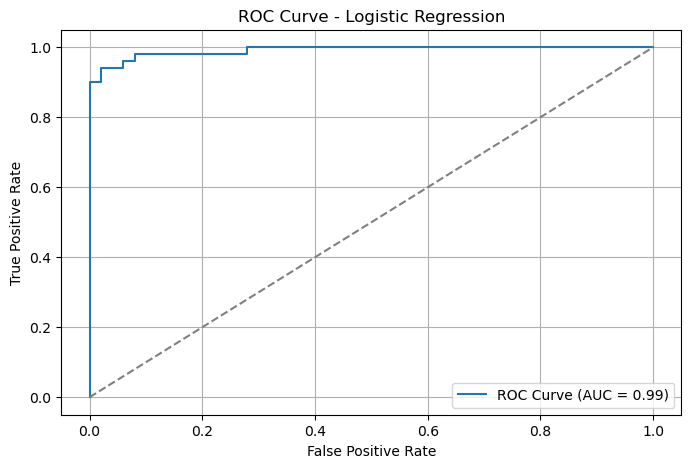

In [ ]:
#Roc CUrve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#hyperperameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}
log_reg = LogisticRegression()

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',  # or 'accuracy', 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=1)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

best_model = grid_search.best_estimator_


Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (F1): 0.9948717948717949


In [ ]:
# best model evaluations
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

ROC-AUC Score: 0.9972


In [31]:
import pickle
pickle.dump(best_model, open("model.pkl", "wb"))

📘 Final Report Summary
Objective: Predict cryptocurrency liquidity to aid market stability.

Data Source: CoinGecko historical dataset.

EDA Insights:

Liquidity highly correlated with market cap and volume.

Data had skewed distributions, which were normalized.

Preprocessing:

Imputation, date handling, clipping.

Next Steps (if not in notebook):

Apply regression models (RandomForest, XGBoost).

Evaluate with RMSE, MAE.

Deploy model with a UI/dashboard (optional).